In [1]:
import pandas as pd

import yaml

from dms_struct.colorschemes import ValueToColorMap
from dms_struct.struct_widget import colored_struct

In [2]:
data = (pd.read_csv('data/Lee_serum_mapping.csv')
        .query('serum == "2010-age-21"')
        .reset_index(drop=True)
        )

data.head()

,serum,serum_group,site,isite,pdb_chain,pdb_site,zoom_site,wildtype,mutation,mutdiffsel,positive_diffsel,negative_diffsel,abs_diffsel
0,2010-age-21,human,193,208,A,193,True,F,D,3.6671,15.837,-1.5467,17.384
1,2010-age-21,human,193,208,A,193,True,F,N,3.1793,15.837,-1.5467,17.384
2,2010-age-21,human,193,208,A,193,True,F,Q,2.0820,15.837,-1.5467,17.384
3,2010-age-21,human,193,208,A,193,True,F,E,2.0098,15.837,-1.5467,17.384
4,2010-age-21,human,193,208,A,193,True,F,L,1.0960,15.837,-1.5467,17.384


In [3]:
prop_df = (data
           [['pdb_chain', 'pdb_site', 'zoom_site', 'positive_diffsel']]
           .drop_duplicates()
           .reset_index(drop=True)
           )
print(f"We now have data for {len(prop_df)} sites.")

We now have data for 566 sites.


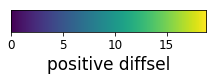

In [4]:
colormapper = ValueToColorMap(prop_df['positive_diffsel'].min(),
                              prop_df['positive_diffsel'].max())

_ = colormapper.scale_bar(label='positive diffsel', orientation='horizontal')

In [5]:
prop_df = prop_df.assign(color=lambda x: (x['positive_diffsel']
                                          .apply(colormapper.val_to_color)
                                          )
                         )

prop_df.head()

,pdb_chain,pdb_site,zoom_site,positive_diffsel,color
0,A,193,True,15.8370,#95d73f
1,A,144,True,9.9572,#1e978a
2,A,159,True,11.6170,#26ac81
3,A,160,True,4.6819,#3b518a
4,A,135,False,3.0065,#453681


https://github.com/arose/nglview/issues/785#issuecomment-487409212

In [6]:
with open('data/pdb_orientations.yaml') as f:
    orientations = yaml.safe_load(f)['4o5n']

In [7]:
w_cartoon = colored_struct(
                pdb='4o5n',
                prop_df=prop_df,
                chain_col='pdb_chain',
                site_col='pdb_site',
                orientation=orientations['vertical_trimer'],
                )
w_cartoon

NGLWidget()

In [8]:
w_cartoon_ball = colored_struct(
                    pdb='4o5n',
                    prop_df=prop_df,
                    chain_col='pdb_chain',
                    site_col='pdb_site',
                    highlight_col='zoom_site',
                    orientation=orientations['vertical_trimer'],
                    )
w_cartoon_ball

NGLWidget()

In [9]:
w_surface = colored_struct(
                pdb='4o5n',
                prop_df=prop_df,
                representation='surface',
                chain_col='pdb_chain',
                site_col='pdb_site',
                orientation=orientations['vertical_trimer'],
                )
w_surface

NGLWidget()

In [10]:
w_ha1 = colored_struct(
                pdb='4o5n',
                prop_df=prop_df.query('pdb_chain == "A"'),
                chain_col='pdb_chain',
                site_col='pdb_site',
                highlight_col='zoom_site',
                orientation=orientations['vertical_trimer'],
                )
w_ha1

NGLWidget()

In [11]:
w_ha2gray = colored_struct(
                pdb='4o5n',
                prop_df=prop_df.query('pdb_chain == "A"'),
                chain_col='pdb_chain',
                site_col='pdb_site',
                highlight_col='zoom_site',
                show_other='protein',
                other_color='gray',
                orientation=orientations['vertical_trimer'],
                )
w_ha2gray

NGLWidget()

You can save the images with the `download_image` command: http://nglviewer.org/nglview/latest/api.html?highlight=download_image#nglview.NGLWidget.download_image